## 통계적 추정
### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평군이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해 가는 성질을 알치성이라고 하며 일치성을 지닌 추정량을 일치 추정량이라고 함.
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
- 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
- 불편분산은 표본분산에서 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은 $s^2$으로 나타낸다.

### 구간추정
- 모분산을 알고 있는 경우의 모평균 구간추정
- 모분산을 알고 있는 경우의 모분산 구간추정
- 모분산을 알지 못하는 경우의 모평균 구간추정
- 베르누이 분포의 모평균의 구간 추정
- 포아송 분포의 모평균의 구간추정

In [1]:
# [과제] 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행하세요.

In [11]:
# 데이터 불러오기, 모평균과 모분산
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df=pd.read_csv('./data/ch4_scores400.csv')

scores=np.array(df.score)
p_mean=np.mean(scores)
p_var=np.var(scores)

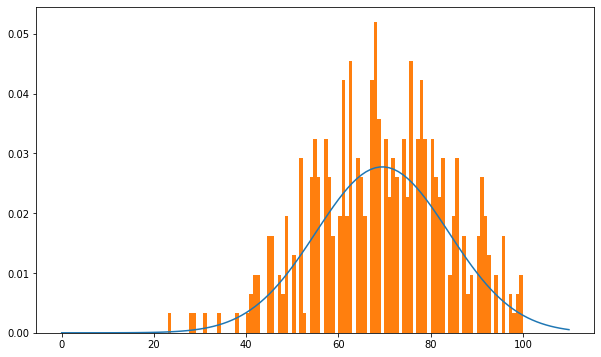

In [4]:
plt.figure(figsize=(10,6))
xs=np.arange(111)
rv=stats.norm(np.mean(scores),np.sqrt(np.var(scores)))
plt.plot(xs,rv.pdf(xs))
plt.hist(scores,bins=100,density=True)
plt.show()

In [ ]:
np.random.seed(0)
sample_size=10000
n=20
samples=np.random.choice(scores,n)
np.mean(samples),np.var(samples)

for i in range(sample_size):
    s_mean = np.mean(samples[i])
    s_var = np.var(samples[i])
#     print(f'{i}번째 평균 {s_mean},분산 {s_var}')
print(np.mean(np.mean(samples,axis=1)),np.mean(np.random.choice(score,int(1e6))))
print(np.mean(np.var(samples,axis=1,ddof=1)),np.var(np.random.choice(score,int(1e6)),ddof=1))

In [ ]:
# 시험점수 데이터 불러오기
df = pd.read_csv('dataset/ch4_scores400.csv')
scores = np.array(df['score'])
display(df)

# 모평균과 모분산 
p_mean = np.mean(scores)
p_var = np.var(scores)
print('모평균, 모분산:', p_mean, p_var)

# 시험점수 모집단(전교생 시험점수)이 정규분포를 따른다고 가정 
plt.figure(figsize=(10,6))
xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
plt.plot(xs, rv.pdf(xs), color='gray')
plt.hist(scores, bins=100, range=(0,100), density=True) # 전체 시험점수 히스토그램
plt.show()

# 무작위추출한 20명의 시험점수 표본 데이터
np.random.seed(0)
n = 20
sample = np.random.choice(scores, n)
print('시험점수 표본 데이터:', sample)

# 표본 크기가 20인 표본 데이터 1만 개 추출
# (표본으로 평균과 분산을 어느 저옫의 정확도로 추출할 수 있는지 시뮬레이션)
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 대수의 법칙을 사용하여 기댓값이 모평균인 것을 확인
sample_means = np.mean(samples, axis=1) # 준비해둔 1만 개의 표본 데이터(n=20) 각각의 표본평균을 구하고
s_means = np.mean(sample_means)         # 그 표본평균들의 평균(기댓값) 계산
print('모평균:', p_mean, '\n', 
      '표본평균의 기댓값:', s_means)


In [ ]:
## 표본분산이 모분산의 불편추정량이 되는지 대수의 법칙으로 확인
sample_vars = np.var(samples, axis=1) # 준비해둔 1만 개의 표본 데이터 각각의 표본분산 구하고
s_vars = np.mean(sample_vars)         # 표본분산의 평균 
## 불편분산이 모분산의 불편추정량이 되는지 확인
sample_u_vars = np.var(samples, axis=1, ddof=1)
u_vars = np.mean(sample_u_vars)
print('모분산:', p_var, '\n', 
      '표본분산:', s_vars, '\n', 
     '불편분산:', u_vars)


모분산을 모르는 경우
- $\sqrt{\sigma^2/n}$ 대신 불편표준편차의 $\sqrt{s^2/n}$를 표준오차로 사용한다.
- 표준화 과정에서 다음의 식이 사용되는데, 이것은 t분포를 따른다. (카이제곱분포 Y 이용하여 구함)  
$t = $ $Z \over \sqrt{Y/(n-1)}$
- 이 때, $\alpha$ 신뢰구간은 다음과 같다.  
$[\bar{X}-t_{\alpha/2}(n-1)\sqrt{s^2/n}, \bar{X}-t_{1-\alpha/2}(n-1)\sqrt{s^2/n}]$


In [ ]:
# [과제] 모분산을 알지 못할 때 정규분포의 모평균의 구간 추정을 파이썬 코드로 수행하세요.
s_mean=np.mean(sample)
u_var=np.var(sample,ddof=1)

rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)
lcl, ucl

In [4]:
# [과제] 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설정하여 모평균 신뢰구간을 구하세요
n_access_df = pd.read_csv('data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

s_mean = n_access.mean()
s_mean

rv = stats.norm
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)
lcl,ucl


(9.697953549598202, 11.190935339290688)

## 통계적 가설검정
### 귀무가설
- 가설에 대해 차이나 효과가 없다. $H_0$
- 기각은 귀무가설이 옳지 않음을 의미함.
- 채택은 귀무가설이 옳지 않다고 말할수 없음을 의미함. 확정하지 않음.
- 
### 대립가설
- 주장 하고자 하는 가설이 대립가설이다.(ex. 감자의 평균이 130보다 작다.)
- 가설에 대해 차이나 효과가 있다. $H_1$
#### 기각역
#### 채택역
#### 유의수준-임계값
#### 검정통계량

In [26]:
# 데이터 불러오기
df=pd.read_csv('./data/ch11_potato.csv')
sample=np.array(df.무게)
print(sample)

# 샘플의 평균
s_mean = np.mean(sample)
print(s_mean)

# 하위 5프로의 지점
rv = stats.norm(130,np.sqrt(9/14))
print(rv.isf(0.95))

# 검정통계량의 값
z=(s_mean - 130) / np.sqrt(9/14)
print(z)

# 임계값
rv = stats.norm()
print(rv.isf(0.95))

# p값
rv.cdf(z)
print(rv.cdf(z))

# 귀무가설이 기각됨 p<0.05
# 모평균은 130g이다 라는 결론이 되는 것은 아니다. 

[122.02 131.73 130.6  131.82 132.05 126.12 124.43 132.89 122.79 129.95
 126.14 134.45 127.64 125.68]
128.4507142857143
128.68118313069039
-1.932298779026813
-1.6448536269514722
0.026661319523126635


Text(0, 0.5, 'cdf')

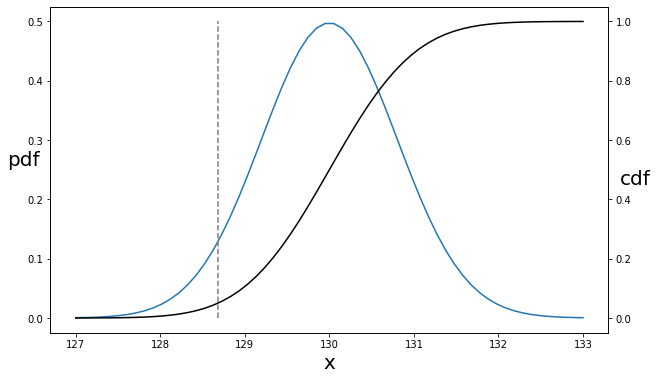

In [6]:
import matplotlib.pyplot as plt
rv=stats.norm(130,np.sqrt(9/14))
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
ax2=ax1.twinx()
xs=np.linspace(127,133,60)
ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.isf(0.95),0,0.5,color='gray',ls='--')
ax1.set_xlabel('x',fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)


In [7]:
#양측검정
z=(s_mean - 130) / np.sqrt(9/14)
z

-1.932298779026813

In [8]:
rv=stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [9]:
# 양측검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
# p값이 0.05보다 크므로 기무가설은 기각되지 않는다. '감자튀김의 무게는 130g이 아니다'라고 말할 수 없다.
rv.cdf(z)*2

0.05332263904625327

#### 가설검정에서의 두가지 오류
- 제 1종 오류 : 귀무가설이 옳을때 귀무가설이 기각하는 오류
 - 실제로 평균이 130g인데도 평균은 130g 보다 작다라는 결론을 내리는 상황
- 제 2종 오류 : 대립가설이 옳을 대 귀무가설을 채택하는 오류
 - '모평균은 130g 보다 작다'인데도 '모평균은 130g 이다' 라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제 1종 오류는 제어항ㄹ 수 있으나 제 2종 오류는 제어할 수 없는 비대칭성이다.

$\beta$

In [17]:
# 제 1종 오류를 범할 비율 : 위험률, 유의수준(𝛼), 분삭가가 제어할수 있는 확률
np.random.seed(10)
rv=stats.norm(130,3)
c=stats.norm().isf(0.95)
n_sample=10000
cnt=0
for _ in range(n_sample):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_sample

0.0522

In [15]:
# 제 2종 오류를 범할 비율(과제) : 1-𝛽,검정력,분석가가 제어할 수 없는 확률
np.random.seed(10)
rv=stats.norm(128,3)
c=stats.norm().isf(0.95)
n_sample=10000
cnt=0
for _ in range(n_sample):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
cnt / n_sample

0.1932

In [18]:
# 정규분포이 모평균에 대한 검정(모분산을 알고 있음)

In [1]:
# [과제] 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김 사례에 대하여 양측검정으로 수행하세요

In [5]:
import pandas as pd
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])
sample

def pmean_test(sample,mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean-mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1-rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')


In [29]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample,var0, alpha=0.05):
    u_var = np.var(sample,ddof=1)
    n=len(sample)
    rv=stats.chi2(df=n-1)
    interval = rv.interval(1-alpha)
    
    y=(n-1) * u_var/var0 # 검정통계량
    if interval[0] <= y <= interval[1]:
        print('귀무가설 채택')
    else:
        print('귀무가설 기각')
    if y<rv.isf(0.5):
        p=rv.cdf(y)*2
    else:
        p=(1-rv.cdf(y))*2
    print(p)

In [30]:
pvar_test(sample,9)

귀무가설 채택
0.08524846084256699


In [8]:
pman_test(sample,130)

NameError: name 'pman_test' is not defined

In [ ]:
대응표본 독립표본에 대하여 정규분포 가정하는 경우와 가정할수 없는 경우의 4가지 유형
# 대응표본 신약 개발테스트
 - 비정규분포 -> 표본이 부족함
# 독립표본은

대응비교- ex) 같은 시간에 수영을 하는 아침반 참여 사람들이 수영을 한달 한 뒤 살이 빠지는지
#독립비교-아침반 사람들은 초보자이고 오후반 사람들은 선수반인데 오후반 사람들은 수영을 시작하기 전과
비교해서 살이 많이 빠졌을까


In [35]:
data = pd.read_csv('./data/ch11_training_rel.csv')
data['gap'] = data['후']-data['전']
data

,전,후,gap
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25
5,45,37,-8
6,55,60,5
7,49,52,3
8,49,68,19
9,52,70,18


In [37]:
# 귀무가결을 기각함, 근력운동은 집중력에 유의한 차이를 가져온다' 라고 할 수 있다.
t,p=stats.ttest_1samp(data.gap, 0)
t,p

(2.204154108716127, 0.04004419061842953)

In [38]:
# 독립표본 t검정
data=pd.read_csv('./data/ch11_training_ind.csv')

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51
5,45,52
6,53,50
7,43,47
8,44,46
9,45,52


In [39]:
# t값이 0.05보다 크므로 귀무가설을 채택함. A학급과 B학급의 학생사이에는 평균 점수에 유의한 차이가 있다고 말할 수 없다.
t,p = stats.ttest_ind(data.A,data.B,equal_var=False)
p

0.08695731107259362

In [ ]:
# [과제] 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정을 수행하세요.
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()
월콕슨

In [18]:
# [과제] 정규분포를 가정할 수 없는 경우 독립표본에 대한 가설검정을 수행하세요.
data = pd.read_csv('./data/ch11_training_ind.csv')
data2 = data[:5].copy()
data2

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [23]:
training_ind = pd.read_csv('./data/ch11_training_ind.csv')
u,p = stats.mannwhitneyu(data2['A'],data2['B'],alternative='two-sided')
p


0.30952380952380953

In [ ]:
[과제] 독립성 검정이 필요한 사례 2가지를 작성하세요.

In [43]:
df=pd.read_csv('./data/ch11_ad.csv')
df

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다
...,...,...
995,B,하지 않았다
996,B,하지 않았다
997,B,하지 않았다
998,B,하지 않았다


In [45]:
# 교차집계표
ad_cross = pd.crosstab(df.광고,df.구입)
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [48]:
# p값이 0.05보다 크므로 귀무가설을 채택하며 '광고 A와 광고 b에 유의미한 차이가 인정되지 않는다'고 결론 내릴 수 있다
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,correction=False)
chi2, p, dof, ef

(3.75,
 0.052807511416113395,
 1,
 array([[360.,  40.],
        [540.,  60.]]))

In [ ]:
# [과제] 기대도수와 관측도수(실측)의 차이를 측정해서 검정 수행